In [ ]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
# Importing the dataset
df = pd.read_csv('/content/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# Checking duplicate values in the dataset
df.duplicated().sum()

np.int64(2)

In [ ]:
# Removing Duplicate Rows
df = df.drop_duplicates()
df.reset_index(drop = True , inplace = True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# Checking the columns containing object data type
object_data = df.select_dtypes(include ='object')
object_data

,Car_Name,Fuel_Type,Selling_type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual
...,...,...,...,...
294,city,Diesel,Dealer,Manual
295,brio,Petrol,Dealer,Manual
296,city,Petrol,Dealer,Manual
297,city,Diesel,Dealer,Manual


In [ ]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [ ]:
df['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [ ]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [ ]:
# Applying Label Encoding on Categorical Columns
encoder = LabelEncoder()

df['Car_Name'] = encoder.fit_transform(df['Car_Name'])

In [ ]:
df['Selling_type'] = encoder.fit_transform(df['Selling_type'])

In [ ]:
df['Transmission'] = encoder.fit_transform(df['Transmission'])

In [ ]:
df['Fuel_Type'] = encoder.fit_transform(df['Fuel_Type'])

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    int64  
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    int64  
 6   Selling_type   299 non-null    int64  
 7   Transmission   299 non-null    int64  
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 21.2 KB


In [ ]:
# Data Visualization
def Vsualize(column_name,data):

    values = df[column_name].value_counts().values.round(2)
    index = df[column_name].value_counts().index

    color = sns.color_palette('RdBu')
    plt.figure(figsize=(7,5))
    # pie chart of column
    plt.subplot(1, 2, 1)
    plt.title(f'Distribution of {column_name}')
    plt.pie(values, labels=index,autopct='%1.1f%%',colors=color)

    # Distribution of column
    plt.subplot(1, 2, 2)
    sns.histplot(data[column_name])
    plt.ylabel(f'Number of {column_name}')
    plt.tight_layout()
    plt.show()

    Car_Name  count
0         69     26
1         71     16
2         94     14
3         66     10
4         81     10
..       ...    ...
93        30      1
94        24      1
95        19      1
96        18      1
97         3      1

[98 rows x 2 columns] 



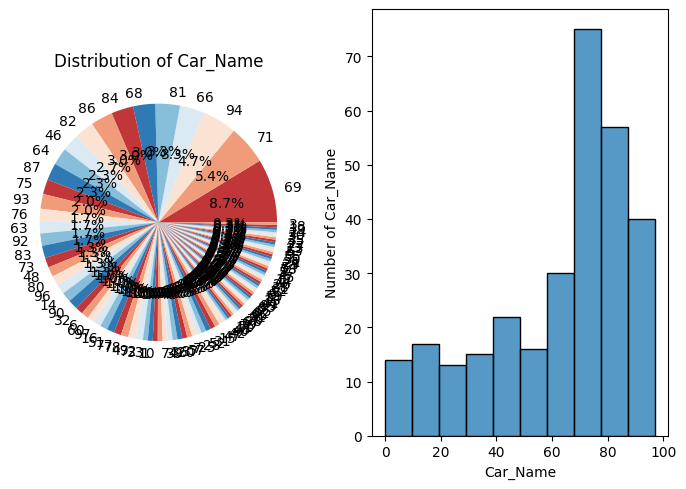

   Fuel_Type  count
0          2    239
1          1     58
2          0      2 



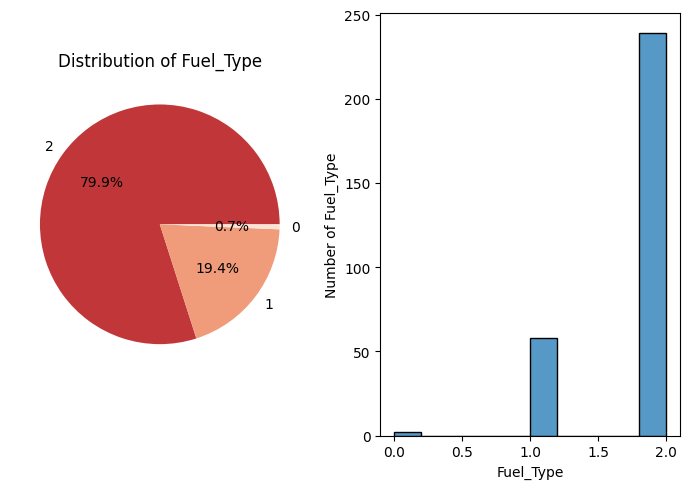

   Selling_type  count
0             0    193
1             1    106 



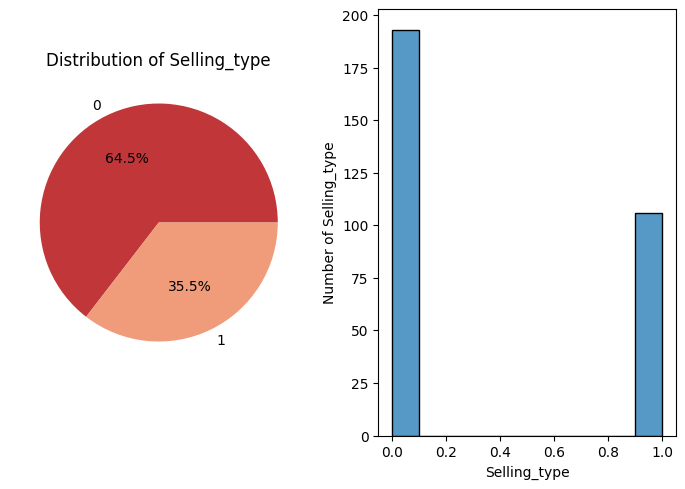

   Transmission  count
0             1    260
1             0     39 



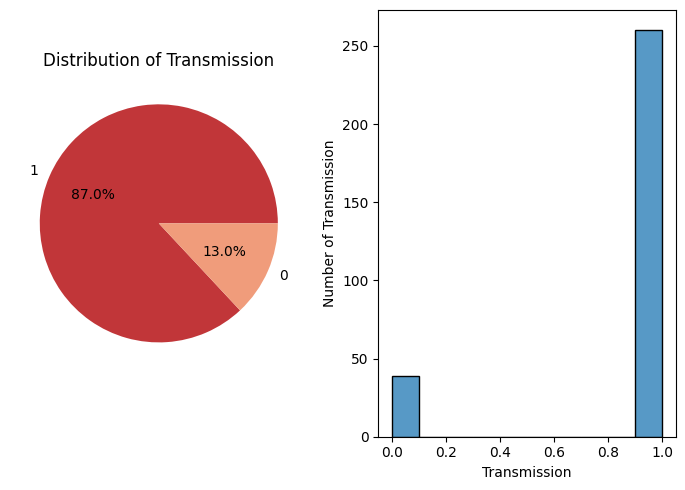

In [ ]:
for column in object_data.columns:
    print(df[column].value_counts().reset_index(),'\n')
    Vsualize(column,df)

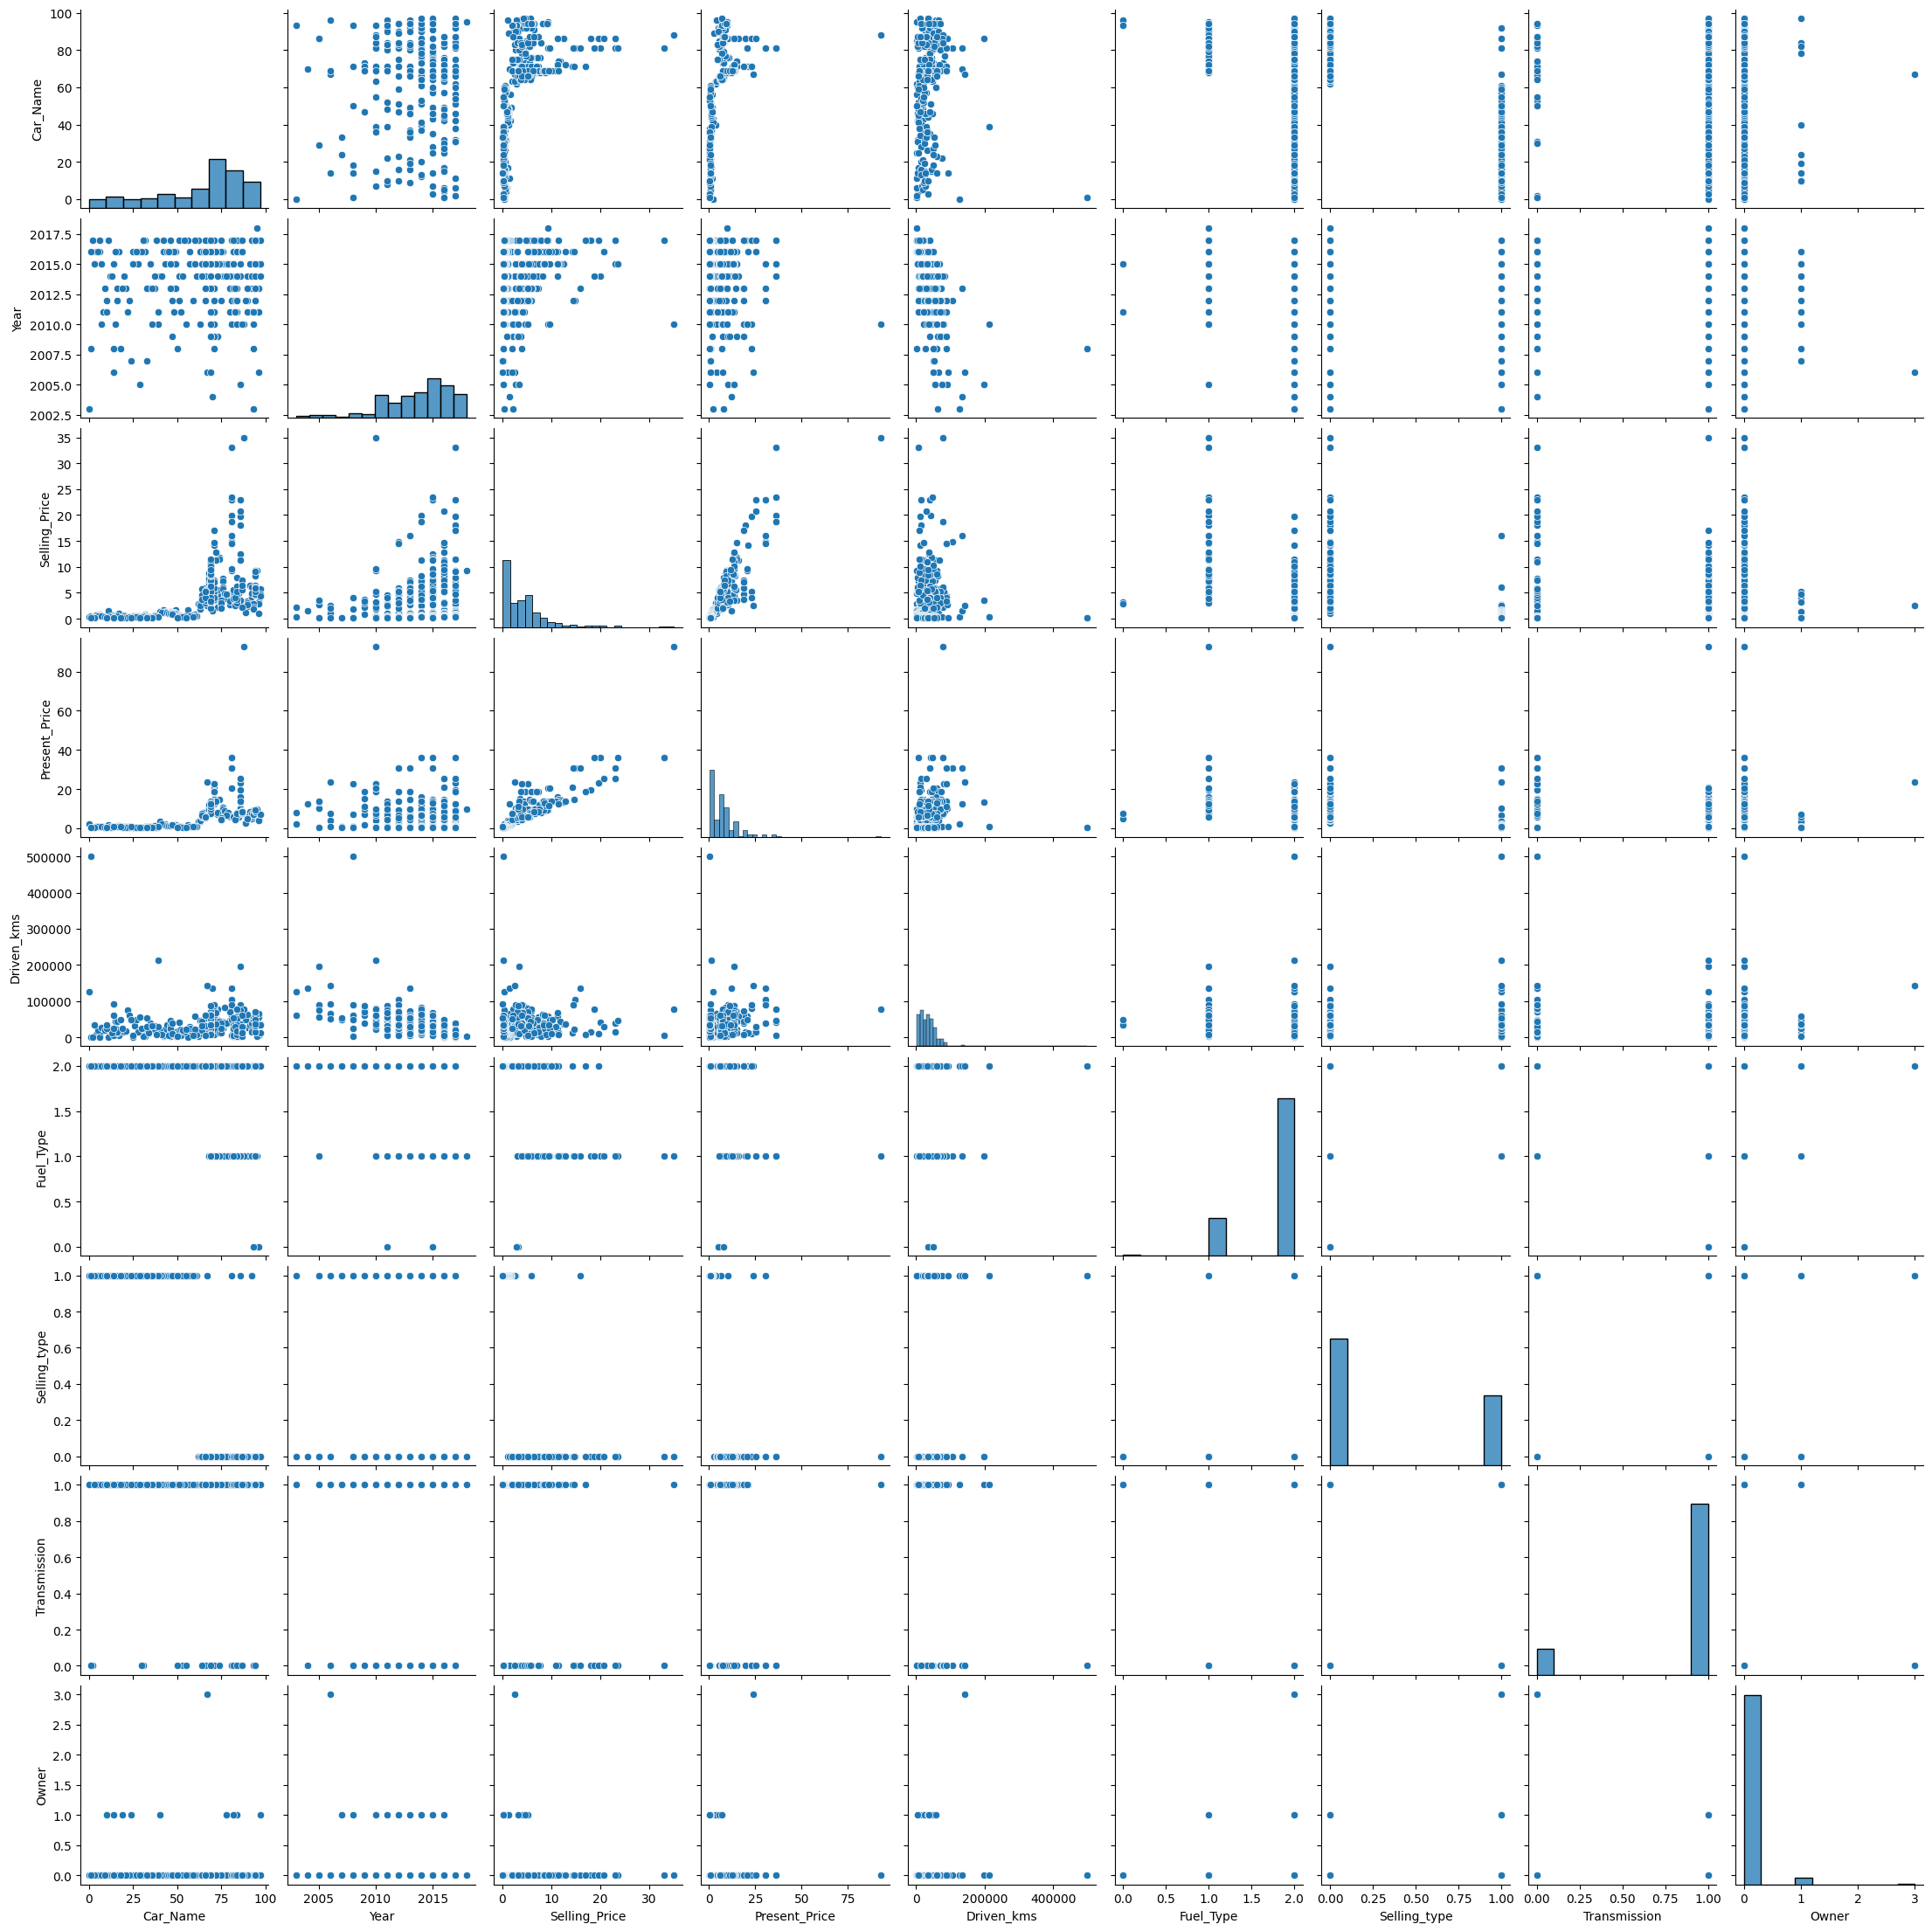

In [ ]:
sns.pairplot(df)

   Owner  count
0      0    288
1      1     10
2      3      1


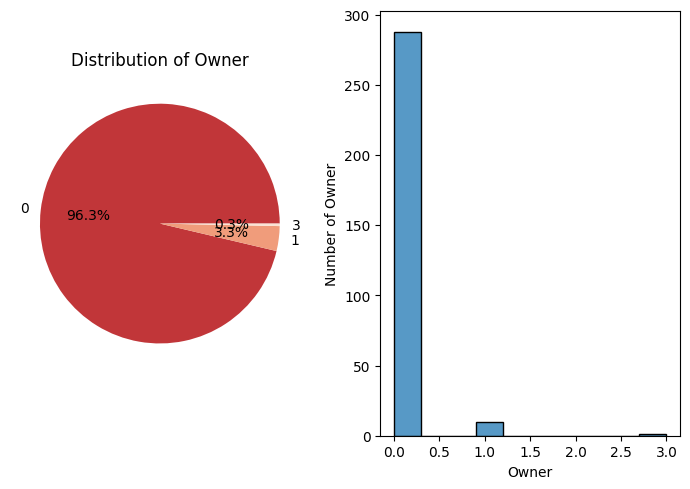

In [ ]:
print(df['Owner'].value_counts().reset_index())
Vsualize('Owner',df)

In [ ]:
# Splitting input and output columns
x =df.drop('Selling_Price',axis = 1)
y = df['Selling_Price']

In [ ]:
# Scaling the input columns
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state = 2 , test_size = 0.2)

In [ ]:
# Linear Regression
LR = LinearRegression()
LR.fit(x_train , y_train)

LinearRegression()

In [ ]:
y_pred = LR.predict(x_test)

In [ ]:
r2_score(y_test , y_pred)

0.7871201162480753

In [ ]:
# Decision Tree
DTR = DecisionTreeRegressor()
DTR.fit(x_train , y_train)

DecisionTreeRegressor()

In [ ]:
y_pred1 = DTR.predict(x_test)

In [ ]:
r2_score(y_test , y_pred1)

0.9448149992138842

In [ ]:
# Random Forest
RFR = RandomForestRegressor()
RFR.fit(x_train , y_train)

RandomForestRegressor()

In [ ]:
y_pred2 = RFR.predict(x_test)

In [ ]:
r2_score(y_test , y_pred2)

0.9433188817994307